In [36]:
import pandas as pd


In [37]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/churn_data/customer_churn_data.csv")

In [38]:
df


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [39]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [41]:
df.isna().sum().sum()

np.int64(297)

In [42]:
df["InternetService"] = df["InternetService"].fillna("")

In [43]:
df.isna().sum().sum()

np.int64(0)

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [46]:
numeric_column_data = df.select_dtypes(include= {"number"})

In [47]:
numeric_column_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [48]:
import matplotlib.pyplot as plt

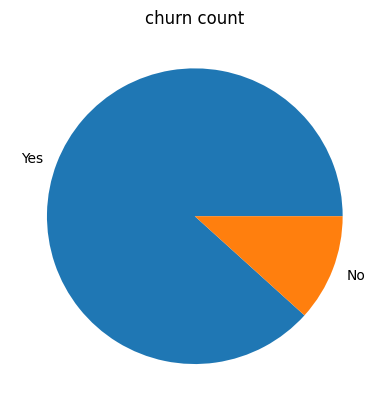

In [49]:
df["Churn"].value_counts().plot(kind= "pie")
plt.title("churn count")
plt.ylabel("")
plt.show()

In [50]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [51]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [52]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [53]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [54]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [55]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

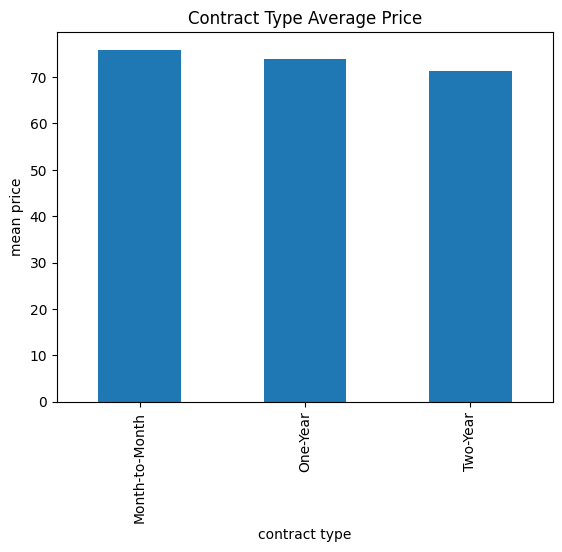

In [56]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("mean price")
plt.xlabel("contract type")
plt.title("Contract Type Average Price")
plt.show()

In [57]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


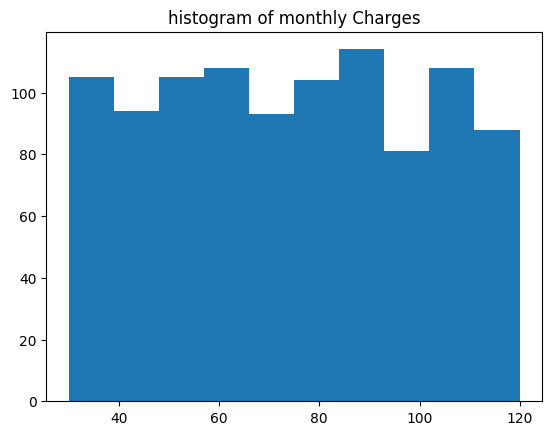

In [58]:
plt.hist(df["MonthlyCharges"])
plt.title("histogram of monthly Charges")
plt.show()

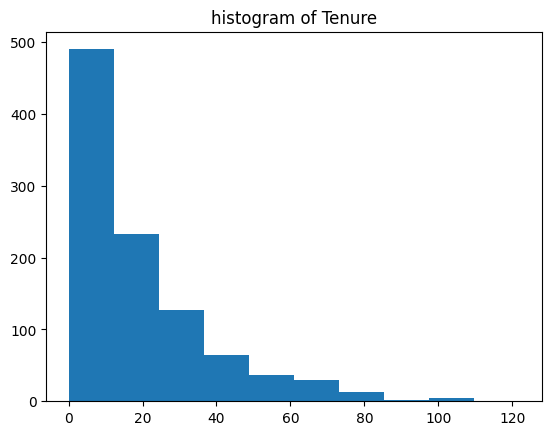

In [59]:
plt.hist(df["Tenure"])
plt.title("histogram of Tenure")
plt.show()

In [60]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [61]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [91]:
y = df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [63]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [64]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [65]:
x["Gender"]= x["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [66]:
x


,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [67]:
y["Churn"]= y["Churn"].apply(lambda x: 1 if x== "Yes" else 0)

In [68]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [69]:
type(y["Churn"][0])

numpy.int64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [71]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x_train = scaler.fit_transform(x_train)

In [75]:
import joblib

In [76]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [77]:
x_test = scaler.fit_transform(x_test)

In [78]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is {:.2f}".format(accuracy_score(y_test, prediction)))

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_model = LogisticRegression()


In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [85]:
y_pred =log_model.predict(x_test)

In [86]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"],
}

In [89]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5 )

In [90]:
gridkn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [92]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [93]:
y_predict = gridkn.predict(x_test)

In [94]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [95]:
from sklearn.svm import SVC

In [96]:
svm = SVC(
    
)

In [98]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}


In [99]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [100]:
gridsvc.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [101]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [103]:
y_pred = gridsvc.predict(x_test)

In [104]:
modelperformance(y_pred)

Accuracy score on model is 0.92


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]

}

In [118]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [119]:
grid_tree.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [120]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [121]:
y_pred = grid_tree.predict(x_test)

In [122]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [123]:
modelperformance(y_pred)

Accuracy score on model is 0.90


In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [131]:
param_grid = {
    "n_estimators" : [16,32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]
}

In [128]:
grid_rfc = GridSearchCV(rfc_model,param_grid, cv = 5)

In [129]:
grid_rfc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [133]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [135]:
y_pred = grid_rfc.predict(x_test)

In [136]:
modelperformance(y_pred)

Accuracy score on model is 0.87


In [138]:
best_model = gridsvc.best_estimator_

In [139]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [140]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

 Volume in drive C has no label.
 Volume Serial Number is 9C5C-D02C

 Directory of c:\Users\Lenovo\Downloads

16-12-2025  23:09    <DIR>          .
12-12-2025  23:37    <DIR>          ..
18-05-2025  15:01            12,783 -720p.m3u8
18-05-2025  00:20               273 0L8IIYXWPCRTH6PMPBUQ1YIECH.m3u8_in=07a73f557043900f91bb1dd2fd60a03d__ba87f737c99821625c2047b5627056cc__1747507673__ni
18-05-2025  15:00               273 0N8Z80EW003AWFU9PQL8JYHH4T.m3u8_in=07a73f557043900f91bb1dd2fd60a03d__aa62ccdb50c2f7039b497cd5c0dd450e__1747560637__ni
09-06-2025  17:31            47,893 1 Describe the key characteristics of softwareKey Characteristics of SoftwareSoftware has several unique characteristics that distinguish it from hardware and other engineered products.docx
02-11-2025  17:47            34,212 1 Knowledge Roles in Diagnostic Report Annotation.docx
02-11-2025  17:47         4,082,907 1 Knowledge Roles in Diagnostic Report Annotation.pdf
07-10-2025  21:52           233,262 1-cc3472fa-a1c3